In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv')
df['Activity'] = df['Activity'].map(
    {
        'STANDING':0,
        'SITTING':1,
        'LAYING':2,
        'WALKING':3,
        'WALKING_DOWNSTAIRS':4,
        'WALKING_UPSTAIRS':5,
    }
)
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = np.array(df.drop(['Activity'],1))
y = np.array(df['Activity'])
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 4)
X_test.shape

(10299, 561)
(10299,)


(1030, 561)

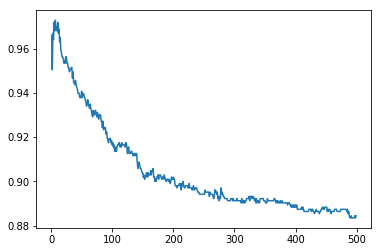

In [19]:
# %matplotlib inline
# myrange = range(1,500)
# scores = []

# for k in myrange:
#     knn = KNeighborsClassifier(n_neighbors = k)
#     knn.fit(X_train,y_train)
#     scores.append(knn.score(X_test, y_test))
    
# plt.plot(myrange, scores)
# plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

knn.score(X_test, y_test)


0.97281553398058251